In [1]:
import pandas as pd
import numpy as np
import re
import yfinance as yf
import datetime
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

In [5]:
# #data = yf.download('BHARATRAS.NS','2016-01-01','2021-08-01')
# data = yf.download('^NSEI','2016-01-01','2021-08-01')
# # Plot the close price of the AAPL
# data['Adj Close'].plot()
# #data['Close'].plot()
# plt.show()

In [1]:
# import pandas as pd
# tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# # Fetch the data
# data = yf.download(tickers_list,'2015-1-1')['Adj Close']
# #data = yf.download("SPY AAPL MSFT",'2015-1-1',group_by = 'ticker',threads = True)#['Close']
# #data = yf.download(tickers_list,'2015-1-1',group_by = 'ticker',threads = True)#['Close']

# # Print first 5 rows of the data
# print(data.shape)
# print(data.head())

In [15]:
df_analysis = pd.read_csv('df_validations_2021_30Deciles.csv').set_index('Unnamed: 0')
df_analysis.head(4)

,Tikr_x,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,lgb_label,xgb_label,rf_label,RandomForest_Bucket,XgBoost_Bucket,LGBM_Bucket,rf_decile,lgb_decile,xgb_decile,Return_AD
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,20MICRONS,288.0,311.0,333.0,357.0,385.0,7.986111,7.073955,7.207207,7.843137,...,0,1,1,Bin 56-60,Bin 51-55,Bin 21-25,Decile_27,Decile_09,Decile_19,-9.439269
1,3IINFOTECH,1278.0,1437.0,1431.0,1521.0,1833.0,12.441315,-0.417537,6.289308,20.512821,...,1,1,1,Bin 51-55,Bin 66-70,Bin 66-70,Decile_25,Decile_25,Decile_27,-38.302599
2,3MINDIA,1742.0,1840.0,2140.0,2363.0,2556.0,5.625718,16.304348,10.420561,8.167584,...,1,1,1,Bin 51-55,Bin 66-70,Bin 56-60,Decile_25,Decile_22,Decile_27,68.158844
3,5PAISA,5.0,11.0,-1.0,7.0,20.0,120.000000,-109.090909,-800.000000,185.714286,...,0,0,0,Bin 36-40,Bin 26-30,Bin 21-25,Decile_12,Decile_08,Decile_07,1.204723


In [16]:
# Normalizing the scores between 0 and 1
df_analysis[['lgb_score','xgb_score','rf_score']] = df_analysis[['lgb_score','xgb_score','rf_score']].apply(lambda x: x/x.max(), axis=0)

In [17]:
#df_analysis[['lgb_score','xgb_score','rf_score']] = (df_analysis[['lgb_score','xgb_score','rf_score']] - df_analysis[['lgb_score','xgb_score','rf_score']].mean())/df_analysis[['lgb_score','xgb_score','rf_score']].std()
df_analysis['Avg_Score'] = df_analysis[['lgb_score','xgb_score','rf_score']].mean(axis=1)
df_analysis[['lgb_score','xgb_score','rf_score','Avg_Score']]

,lgb_score,xgb_score,rf_score,Avg_Score
Unnamed: 0,,,,
0,0.229714,0.616343,0.710843,0.518967
1,0.715157,0.808694,0.662651,0.728834
2,0.602931,0.806126,0.662651,0.690569
3,0.216743,0.347894,0.469880,0.344839
4,0.166458,0.272009,0.313253,0.250573
...,...,...,...,...
1354,0.208235,0.321413,0.349398,0.293015
1355,0.195275,0.451017,0.301205,0.315832
1356,0.415811,0.445582,0.373494,0.411629


In [18]:
bins = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
labels = ["Bin 1-5","Bin 6-10","Bin 11-15","Bin 16-20","Bin 21-25","Bin 26-30","Bin 31-35","Bin 36-40","Bin 41-45","Bin 46-50","Bin 51-55","Bin 56-60","Bin 61-65","Bin 66-70","Bin 71-75","Bin 76-80",
            "Bin 81-85","Bin 86-90","Bin 91-95","Bin 96-100"]
df_analysis['Main_decile'] = pd.qcut(df_analysis['Avg_Score'], 30, labels=False, duplicates='drop')+1
df_analysis['Main_decile'] = 'Decile_' + df_analysis['Main_decile'].astype(str).str.pad(2,fillchar='0')
df_analysis['Main_Bucket'] = pd.cut(df_analysis['Avg_Score'], bins, labels = labels,include_lowest = True)

# Performance Based Decile
df_analysis['Return_Norm'] = (df_analysis['Return'] - df_analysis['Return'].min()) / (df_analysis['Return'].max() - df_analysis['Return'].min())
df_analysis['Performance_decile'] = pd.qcut(df_analysis['Return_Norm'], 30, labels=False, duplicates='drop')+1
df_analysis['Performance_decile'] = 'Decile_' + df_analysis['Performance_decile'].astype(str).str.pad(2,fillchar='0')
df_analysis['Performance_Bucket'] = pd.cut(df_analysis['Return_Norm'], bins, labels = labels,include_lowest = True)


In [19]:
#df_analysis['Main_Bucket'].value_counts()
df_analysis['Performance_decile'].value_counts()
# There are approx 100 shares in top 3 buckets

Decile_19    46
Decile_15    46
Decile_04    46
Decile_01    46
Decile_08    46
Decile_27    46
Decile_30    46
Decile_23    46
Decile_12    46
Decile_05    45
Decile_22    45
Decile_21    45
Decile_29    45
Decile_09    45
Decile_07    45
Decile_18    45
Decile_16    45
Decile_02    45
Decile_24    45
Decile_13    45
Decile_14    45
Decile_03    45
Decile_06    45
Decile_28    45
Decile_20    45
Decile_11    45
Decile_26    45
Decile_17    45
Decile_25    45
Decile_10    45
Name: Performance_decile, dtype: int64

In [20]:
df_analysis['Main_decile'].value_counts()
# 137 shares in the top decile 

Decile_19    46
Decile_04    46
Decile_01    46
Decile_08    46
Decile_27    46
Decile_30    46
Decile_12    46
Decile_23    46
Decile_15    46
Decile_18    45
Decile_22    45
Decile_21    45
Decile_29    45
Decile_09    45
Decile_07    45
Decile_05    45
Decile_02    45
Decile_16    45
Decile_24    45
Decile_13    45
Decile_14    45
Decile_03    45
Decile_06    45
Decile_28    45
Decile_20    45
Decile_11    45
Decile_26    45
Decile_17    45
Decile_25    45
Decile_10    45
Name: Main_decile, dtype: int64

<AxesSubplot:xlabel='None-Performance_decile', ylabel='Main_decile'>

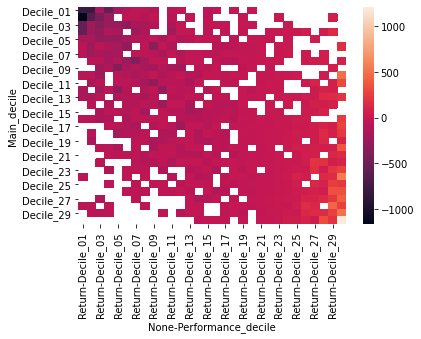

In [21]:
# What is the distribution of Performance decile in Main Decile, 
# How many top performing stocks were part of 

df_heatmap_count = pd.pivot_table(df_analysis, index=['Main_decile'], columns=['Performance_decile'], values=['Return'], aggfunc='count')
df_heatmap_avg = pd.pivot_table(df_analysis, index=['Main_decile'], columns=['Performance_decile'], values=['Return'], aggfunc='mean')
df_heatmap_sum = pd.pivot_table(df_analysis, index=['Main_decile'], columns=['Performance_decile'], values=['Return'], aggfunc='sum')
sns.heatmap(df_heatmap_sum, annot=False)

In [22]:
df_heatmap_sum

Return                                      \
Performance_decile    Decile_01   Decile_02   Decile_03   Decile_04   
Main_decile                                                           
Decile_01           -804.248716 -805.452253 -150.311757 -549.434933   
Decile_02          -1169.778220 -641.494863 -431.427839 -271.740939   
Decile_03           -552.060210 -235.144605 -358.814563 -271.201323   
Decile_04           -552.176429 -243.720242 -297.272659 -135.494319   
Decile_05           -169.989749 -165.877967 -288.179113 -271.383652   
Decile_06            -85.474605 -236.650208  -76.286490 -136.948268   
Decile_07            -91.513372 -242.070375 -144.996036 -209.125987   
Decile_08                   NaN  -77.105125  -72.426911 -203.671000   
Decile_09                   NaN         NaN -221.911422 -139.418866   
Decile_10            -91.056898  -77.742686 -222.230713         NaN   
Decile_11                   NaN -159.336670  -72.731131         NaN   
Decile_12           -173.642487         NaN -219.292016  -68.107627   
Decile_13           -171.507694 -161.493894  -70.496539         NaN   
Decile_14                   NaN  -83.824460         NaN -136.654517   
Decile_15                   NaN         NaN -147.413877  -68.494580   
Decile_16            -86.541819  -79.024117 -149.748519 -132.133229   
Decile_17                   NaN         NaN         NaN  -68.339268   
Decile_18                   NaN  -83.397471         NaN         NaN   
Decile_19                   NaN -161.832552         NaN         NaN   
Decile_20                   NaN         NaN  -74.965479  -69.521948   
Decile_21                   NaN         NaN         NaN  -65.799096   
Decile_22                   NaN         NaN  -75.645034         NaN   
Decile_23                   NaN         NaN         NaN -135.060223   
Decile_24            -85.549561         NaN         NaN         NaN   
Decile_25                   NaN         NaN         NaN  -69.274529   
Decile_26                   NaN         NaN         NaN         NaN   
Decile_27                   NaN         NaN -142.567268         NaN   
Decile_28            -91.791561  -76.603712         NaN  -66.570566   
Decile_29                   NaN  -78.731339  -74.111246  -66.489591   
Decile_30                   NaN         NaN         NaN         NaN   

                                                                    \
Performance_decile   Decile_05   Decile_06   Decile_07   Decile_08   
Main_decile                                                          
Decile_01          -191.909315 -119.085394  -56.714290  -52.469208   
Decile_02                  NaN  -61.013077  -56.589330 -105.127859   
Decile_03          -255.892321 -297.601197 -162.486406 -156.468661   
Decile_04          -189.859493         NaN -222.455568 -156.091162   
Decile_05          -251.186753 -176.357923 -111.985714 -105.837239   
Decile_06          -187.928713 -294.045280         NaN  -52.017827   
Decile_07          -190.650186         NaN  -54.161044  -52.207601   
Decile_08          -125.494114 -238.553010 -384.847194 -158.600443   
Decile_09          -381.333961 -177.651209 -111.764648 -157.522669   
Decile_10           -64.250000 -119.186255 -166.227223 -105.222161   
Decile_11           -64.283238  -61.205889 -110.963112 -209.905231   
Decile_12          -315.472960 -116.553913         NaN -102.884633   
Decile_13          -130.757039 -115.377396 -111.211155 -155.260548   
Decile_14                  NaN -118.061879 -110.049532  -53.551704   
Decile_15           -62.049233 -121.072090  -56.094197 -207.093625   
Decile_16                  NaN -180.931213  -55.560175  -52.147271   
Decile_17           -63.444175 -116.517905 -164.931784         NaN   
Decile_18          -188.333867 -119.180254 -112.063456  -53.647116   
Decile_19                  NaN         NaN  -54.929024  -53.529428   
Decile_20          -126.320761         NaN  -54.672323         NaN   
Decile_21           -62.933559  -58.365533  -54.417874 -104.727063   
D

In [23]:
# Lets pick up top 3 buckets and crete portfolio out of it
#selected_tikrs = df_analysis['Tikr_x'][df_analysis['Main_Bucket'].isin(['Bin 91-100','Bin 81-90','Bin 71-80'])].to_list()
# # Bins based filtering
# selected_tikrs = df_analysis['Tikr_x'][df_analysis['Main_Bucket'].isin(['Bin 91-100','Bin 81-90'])].to_list()
# DEcile based filtering
#selected_tikrs = df_analysis['Tikr_x'][df_analysis['Main_decile'].isin(['Decile_10'])].to_list()
selected_tikrs = df_analysis['Tikr_x'][df_analysis['Main_decile'].isin(['Decile_30','Decile_29','Decile_28','Decile_27','Decile_26','Decile_25'])].to_list()
selected_tikrs = [s + '.NS' for s in selected_tikrs]
selected_tikrs.append('^NSEI')
pd.DataFrame(selected_tikrs).to_clipboard()
selected_tikrs

['3IINFOTECH.NS',
 '3MINDIA.NS',
 'AARTIDRUGS.NS',
 'AARTIIND.NS',
 'ABBOTINDIA.NS',
 'ACE.NS',
 'ADFFOODS.NS',
 'ADVENZYMES.NS',
 'AEGISCHEM.NS',
 'AGCNET.NS',
 'AJMERA.NS',
 'AKZOINDIA.NS',
 'ALICON.NS',
 'ALKYLAMINE.NS',
 'ALLSEC.NS',
 'APCOTEXIND.NS',
 'APEX.NS',
 'APLAPOLLO.NS',
 'ARMANFIN.NS',
 'ASAHIINDIA.NS',
 'ASIANTILES.NS',
 'ASPINWALL.NS',
 'ASTEC.NS',
 'ASTRAL.NS',
 'ASTRAZEN.NS',
 'ATFL.NS',
 'ATULAUTO.NS',
 'AUSOMENT.NS',
 'AUTOAXLES.NS',
 'AVANTIFEED.NS',
 'BAJAJELEC.NS',
 'BAJAJFINSV.NS',
 'BAJFINANCE.NS',
 'BALAMINES.NS',
 'BASF.NS',
 'BATAINDIA.NS',
 'BBTC.NS',
 'BEML.NS',
 'BEPL.NS',
 'BERGEPAINT.NS',
 'BHAGYANGR.NS',
 'BHARATRAS.NS',
 'BLKASHYAP.NS',
 'BLUESTARCO.NS',
 'BUTTERFLY.NS',
 'CANFINHOME.NS',
 'CANTABIL.NS',
 'CAPLIPOINT.NS',
 'CARBORUNIV.NS',
 'CENTURYTEX.NS',
 'CGCL.NS',
 'CIPLA.NS',
 'COLPAL.NS',
 'CONTROLPR.NS',
 'COROMANDEL.NS',
 'CROMPTON.NS',
 'CYIENT.NS',
 'DAAWAT.NS',
 'DABUR.NS',
 'DATAMATICS.NS',
 'DBL.NS',
 'DCMSHRIRAM.NS',
 'DEEPAKNTR.NS',
 '

In [14]:
# #start_value = yf.download(tickers_list,'2021-1-1')['Adj Close']
# #data = yf.download(tickers_list,'2015-1-1')['Adj Close']
# #ibm = pdr.get_data_yahoo(tickers_list, start=datetime(2012, 1, 1), end=datetime(2012, 1, 10))
# ibm = yf.download(tickers_list, start=datetime(2012, 1, 1), end=datetime(2012, 1, 4),group_by='ticker',auto_adjust = True)
# #data = yf.download(tickers_list, start=datetime(2015, 1, 1), end=datetime(2015, 1, 4),group_by='ticker',auto_adjust = True)
# #data

In [24]:
df_trend = yf.download(selected_tikrs,'2019-1-1')['Adj Close']
df_trend = df_trend[pd.to_datetime(df_trend.index) < pd.to_datetime('2019-12-31')]
df_trend

[*********************100%***********************]  273 of 273 completed

2 Failed downloads:
- 3IINFOTECH.NS: No data found, symbol may be delisted
- HARITASEAT.NS: No data found, symbol may be delisted


,3IINFOTECH.NS,3MINDIA.NS,AARTIDRUGS.NS,AARTIIND.NS,ABBOTINDIA.NS,ACE.NS,ADFFOODS.NS,ADVENZYMES.NS,AEGISCHEM.NS,AGCNET.NS,...,VSSL.NS,VSTIND.NS,VSTTILLERS.NS,WABCOINDIA.NS,WELINV.NS,WENDT.NS,WHEELS.NS,WHIRLPOOL.NS,ZYDUSWELL.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,20666.349609,142.629639,346.864166,7362.166504,92.319977,266.564758,174.054398,199.307755,73.000000,...,98.362640,2896.025879,1520.070068,6832.560059,156.000000,2993.334961,876.937866,1385.493286,1345.173340,NaN
2019-01-02,NaN,19985.750000,142.493362,347.366974,7310.690918,95.253876,266.021912,173.262344,199.258911,73.750000,...,96.623024,2818.506104,1495.719482,6811.042969,148.100006,2968.358887,876.599182,1377.848755,1329.620117,10792.500000
2019-01-03,NaN,19990.250000,142.518158,342.206909,7257.175293,95.204971,264.492218,171.826736,202.092209,84.800003,...,96.672729,2715.396973,1487.060425,6749.076172,151.750000,2960.255859,870.792664,1371.782349,1338.528687,10672.250000
2019-01-04,NaN,20357.400391,141.824387,350.396027,7288.789062,96.427422,260.939331,169.252563,203.606522,101.750000,...,97.815910,2740.721436,1495.145386,6667.331543,154.699997,2955.775879,863.002075,1371.831665,1318.397949,10727.349609
2019-01-07,NaN,20388.250000,143.732224,352.419373,7356.485840,96.671913,260.248505,168.510010,204.290451,120.500000,...,97.766205,2852.802246,1524.997559,6434.769043,156.050003,2997.529297,875.631409,1409.166748,1313.918945,10771.799805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,NaN,21438.800781,128.660858,388.077667,12852.065430,69.372757,313.777466,161.885101,165.662354,131.600006,...,63.669807,3808.719482,1043.713867,6447.620117,168.000000,2705.315674,593.462891,2182.009033,1432.613892,12262.750000
2019-12-24,NaN,21641.099609,129.430542,399.046448,12683.774414,70.703056,308.024628,164.469666,169.302200,134.600006,...,65.210602,3781.586426,1043.810913,6335.197266,162.000000,2715.640869,577.631287,2253.253174,1440.398193,12214.549805
2019-12-26,NaN,21496.650391,131.689941,412.397644,12746.139648,69.274216,302.718140,162.531235,170.187561,141.300003,...,65.906456,3812.264893,1040.509033,6329.872559,167.350006,2777.011963,606.680542,2415.004639,1432.663574,12126.549805


In [27]:
df_trend.shape[0]

243

In [28]:
Amount = 50000
pd.options.display.float_format = '{:,.2f}'.format

df_mapping = df_analysis[['Tikr_x','Main_decile']]
df_mapping['Tikr_x'] = df_mapping['Tikr_x'].astype(str) + '.NS'

df_portfolio = pd.DataFrame(df_trend.iloc[1,:])
df_portfolio['Final_Price'] = df_trend.iloc[df_trend.shape[0]-1,:]
df_portfolio.columns = ['Start_Price','Final_Price']
df_portfolio['Quantity'] = np.floor((50000/df_portfolio['Start_Price']))
df_portfolio['Invested'] = df_portfolio['Quantity'] * df_portfolio['Start_Price']
#df_portfolio['Invested'] = df_portfolio['Invested'].apply(lambda x: "${:.1f}k".format((x/1000)))
df_portfolio['Current_Value'] = df_portfolio['Quantity'] * df_portfolio['Final_Price']
df_portfolio['Profit'] = df_portfolio['Current_Value'] - df_portfolio['Invested']
df_portfolio['Profit%'] = (df_portfolio['Profit']/df_portfolio['Invested'])*100
df_portfolio = df_portfolio.reset_index()
df_portfolio.rename(columns={ df_portfolio.columns[0]: "Tikr" }, inplace = True)
df_portfolio = pd.merge(df_portfolio,df_mapping[['Tikr_x','Main_decile']], how='left',left_on=['Tikr'], right_on=['Tikr_x'])
df_portfolio['Main_decile'][df_portfolio['Tikr'] == '^NSEI'] = 'Nifty'
df_portfolio.to_clipboard()

df_portfolio

C:\Users\hashmy\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hashmy\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Tikr,Start_Price,Final_Price,Quantity,Invested,Current_Value,Profit,Profit%,Tikr_x,Main_decile
0,3IINFOTECH.NS,nan,nan,nan,nan,nan,nan,nan,3IINFOTECH.NS,Decile_27
1,3MINDIA.NS,"19,985.75","21,479.05",2.00,"39,971.50","42,958.10","2,986.60",7.47,3MINDIA.NS,Decile_25
2,AARTIDRUGS.NS,142.49,142.80,350.00,"49,872.68","49,980.23",107.55,0.22,AARTIDRUGS.NS,Decile_27
3,AARTIIND.NS,347.37,415.80,143.00,"49,673.48","59,459.04","9,785.56",19.70,AARTIIND.NS,Decile_28
4,ABBOTINDIA.NS,"7,310.69","12,859.86",6.00,"43,864.15","77,159.16","33,295.02",75.90,ABBOTINDIA.NS,Decile_27
...,...,...,...,...,...,...,...,...,...,...
268,WENDT.NS,"2,968.36","2,702.89",16.00,"47,493.74","43,246.27","-4,247.48",-8.94,WENDT.NS,Decile_26
269,WHEELS.NS,876.60,607.52,57.00,"49,966.15","34,628.58","-15,337.57",-30.70,WHEELS.NS,Decile_30
270,WHIRLPOOL.NS,"1,377.85","2,369.92",36.00,"49,602.56","85,317.29","35,714.74",72.00,WHIRLPOOL.NS,Decile_30
271,ZYDUSWELL.NS,"1,329.62","1,466.87",37.00,"49,195.94","54,274.37","5,078.43",10.32,ZYDUSWELL.NS,Decile_30


In [29]:
#df_summary = df_portfolio[['Main_decile','Invested','Current_Value','Profit']].sum()
df_summary = df_portfolio.groupby(['Main_decile']).sum()
df_summary['Profit%'] = (df_summary['Profit']/df_summary['Invested'])*100
df_summary

,Start_Price,Final_Price,Quantity,Invested,Current_Value,Profit,Profit%
Main_decile,,,,,,,
Decile_25,"37,115.75","38,046.48","12,015.00","2,181,327.95","2,022,616.25","-158,711.69",-7.28
Decile_26,"29,660.69","34,245.04","14,445.00","2,233,862.13","2,096,169.46","-137,692.68",-6.16
Decile_27,"30,755.98","37,019.14","10,700.00","2,231,366.72","2,253,203.74","21,837.02",0.98
Decile_28,"24,878.45","24,983.89","15,070.00","2,236,461.73","2,039,696.67","-196,765.07",-8.80
Decile_29,"74,763.35","72,257.50","7,341.00","2,223,195.86","2,044,532.59","-178,663.27",-8.04
Decile_30,"52,297.25","57,878.35","7,178.00","2,277,467.90","2,318,769.45","41,301.55",1.81
Nifty,"10,792.50","12,255.85",4.00,"43,170.00","49,023.40","5,853.40",13.56


In [30]:
df_trend_transposed = df_trend.transpose().reset_index()
#df_trend_transposed.columns[1] = 'Tikr'
df_trend_transposed.rename(columns={ df_trend_transposed.columns[0]: "Tikr" }, inplace = True)
df_trend_transposed = pd.merge(df_trend_transposed,df_portfolio[['Tikr','Quantity','Main_decile']], how='left',left_on=['Tikr'], right_on=['Tikr'])

# Taking the trend of Nifty into a different dataframe
df_trend_nifty = pd.DataFrame(df_trend_transposed.iloc[df_trend_transposed.shape[0]-1,:])
df_trend_nifty.columns = df_trend_nifty.iloc[0]
df_trend_nifty = df_trend_nifty.drop(df_trend_nifty.index[0])

# Multiplying the quantity by value
#df_trend_transposed = df_trend_transposed.iloc[:,1:-1] * df_trend_transposed.iloc[:,-1]
for col in range(len(df_trend_transposed.columns)):
    if col > 0 and col <  len(df_trend_transposed.columns) - 2:
        df_trend_transposed.iloc[:,col] = df_trend_transposed.iloc[:,col].multiply(df_trend_transposed['Quantity'], axis='index')

#df_trend_transposed = df_trend_transposed.iloc[:,1:-2].multiply(df_trend_transposed['Quantity'], axis='index')
# df_trend_transposed['Main_decile'][df_trend_transposed['Tikr'] == '^NSEI'] = 'Nifty'

df_trend_sum = df_trend_transposed.groupby(['Main_decile']).sum()
df_trend_sum = df_trend_sum.drop(['Quantity'],axis = 1)
df_trend_sum

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,...,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30
Main_decile,,,,,,,,,,,,,,,,,,,,,
Decile_25,"2,199,655.15","2,181,327.95","2,193,581.62","2,211,246.58","2,248,037.99","2,241,158.30","2,233,923.02","2,233,280.47","2,232,724.03","2,220,476.26",...,"1,937,800.16","1,963,353.70","1,957,651.65","1,954,269.42","1,958,714.91","1,966,101.26","1,978,908.03","1,993,457.44","2,005,269.55","2,022,616.25"
Decile_26,"2,263,649.66","2,233,862.13","2,220,497.67","2,220,194.60","2,226,061.30","2,228,568.54","2,229,959.76","2,221,964.82","2,223,566.56","2,221,077.23",...,"2,022,413.60","2,040,216.47","2,046,752.76","2,053,318.11","2,051,750.02","2,051,910.27","2,050,523.78","2,066,241.20","2,084,817.39","2,096,169.46"
Decile_27,"2,240,958.80","2,231,366.72","2,230,029.06","2,244,264.30","2,235,995.49","2,228,424.16","2,230,840.34","2,231,878.23","2,231,494.82","2,227,842.83",...,"2,190,112.14","2,213,681.72","2,215,352.33","2,222,830.07","2,223,055.11","2,226,950.33","2,214,744.87","2,228,008.19","2,245,793.24","2,253,203.74"
Decile_28,"2,250,685.47","2,236,461.73","2,227,199.94","2,230,273.61","2,224,412.80","2,227,722.89","2,212,288.47","2,222,925.86","2,215,133.72","2,201,633.93",...,"1,954,284.34","1,967,020.50","1,971,647.80","1,970,175.06","1,967,259.34","1,964,595.11","1,972,978.93","1,991,134.27","2,019,131.32","2,039,696.67"
Decile_29,"2,229,654.03","2,223,195.86","2,216,587.86","2,211,280.25","2,216,118.39","2,219,709.28","2,209,401.57","2,208,941.66","2,203,153.78","2,189,163.83",...,"1,967,134.98","1,979,728.53","1,985,642.96","1,991,405.76","2,001,272.74","2,012,827.82","2,014,012.57","2,018,355.95","2,029,717.95","2,044,532.59"
Decile_30,"2,286,709.70","2,277,467.90","2,271,702.95","2,265,391.21","2,265,320.63","2,261,682.16","2,263,732.98","2,262,586.66","2,261,751.55","2,248,466.74",...,"2,214,684.75","2,213,975.13","2,219,273.80","2,225,887.60","2,231,556.62","2,228,354.88","2,228,423.74","2,264,807.47","2,284,987.35","2,318,769.45"
Nifty,0.00,"43,170.00","42,689.00","42,909.40","43,087.20","43,208.60","43,420.60","43,286.40","43,179.80","42,950.40",...,"48,215.80","48,660.00","48,886.60","49,038.80","49,087.20","49,051.00","48,858.20","48,506.20","48,983.20","49,023.40"


In [31]:
df_trend = df_trend_sum.transpose()
# First 
# row for Nifty is blank so we will assign it and then do the rest of the adjustments
df_trend.iloc[0,len(df_trend.columns)-1] = df_trend.iloc[1,len(df_trend.columns)-1]
df_trend
df_trend.to_clipboard()
df_normalized = df_trend.div(df_trend.iloc[0]).multiply(1000000)
df_normalized.to_clipboard()
df_normalized

Main_decile,Decile_25,Decile_26,Decile_27,Decile_28,Decile_29,Decile_30,Nifty
2019-01-01,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00"
2019-01-02,"991,668.15","986,840.93","995,719.65","993,680.26","997,103.51","995,958.47","1,000,000.00"
2019-01-03,"997,238.87","980,936.98","995,122.74","989,565.16","994,139.82","993,437.40","988,858.00"
2019-01-04,"1,005,269.66","980,803.10","1,001,475.04","990,930.82","991,759.36","990,677.22","993,963.36"
2019-01-07,"1,021,995.65","983,394.80","997,785.18","988,326.81","993,929.26","990,646.36","998,081.98"
...,...,...,...,...,...,...,...
2019-12-23,"893,822.50","906,461.06","993,748.89","872,887.45","902,753.43","974,480.88","1,136,228.86"
2019-12-24,"899,644.67","905,848.56","988,302.36","876,612.46","903,284.79","974,510.99","1,131,762.78"
2019-12-26,"906,259.07","912,791.96","994,220.95","884,679.04","905,232.79","990,421.94","1,123,608.97"
2019-12-27,"911,629.06","920,998.26","1,002,157.31","897,118.39","910,328.65","999,246.80","1,134,658.31"


<AxesSubplot:>

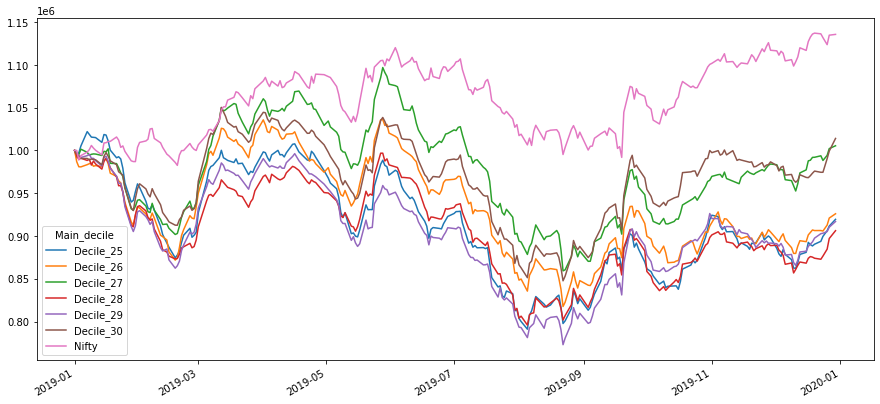

In [32]:
df_normalized= df_normalized[df_normalized['Nifty'] != 0]
df_normalized.dropna().plot(figsize=(15,7))

In [17]:
# #df_trend_compare.iloc[1,:]
# #df_trend_compare
# #df_trend_compare.at[1,1] ##/(df_trend_compare.iloc[1,1])
# df_trend_compare.iloc[1, df_trend_compare.columns.get_loc("Portfolio")]/df_trend_compare.iloc[1, df_trend_compare.columns.get_loc("^NSEI")]

In [33]:
df_valid_out = pd.concat([df_normalized.iloc[0,:], df_normalized.iloc[df_normalized.shape[0]-1,:]], axis=1)
df_valid_out['Profit'] = df_valid_out.iloc[:,1] - df_valid_out.iloc[:,0]
df_valid_out['Profit%'] = (df_valid_out['Profit']/df_valid_out.iloc[:,0])*100
df_valid_out

# df_valid_out = pd.concat([df_trend_compare[['Portfolio','Nifty_Adjusted']].iloc[1,:], df_trend_compare[['Portfolio','Nifty_Adjusted']].iloc[df_trend_compare.shape[0]-1,:]], axis=1)
# df_valid_out['Profit'] = df_valid_out.iloc[:,1] - df_valid_out.iloc[:,0]
# df_valid_out['Profit%'] = (df_valid_out['Profit']/df_valid_out.iloc[:,0])*100
# df_valid_out

,2019-01-01 00:00:00,2019-12-30 00:00:00,Profit,Profit%
Main_decile,,,,
Decile_25,"1,000,000.00","919,515.16","-80,484.84",-8.05
Decile_26,"1,000,000.00","926,013.20","-73,986.80",-7.40
Decile_27,"1,000,000.00","1,005,464.15","5,464.15",0.55
Decile_28,"1,000,000.00","906,255.76","-93,744.24",-9.37
Decile_29,"1,000,000.00","916,973.02","-83,026.98",-8.30
Decile_30,"1,000,000.00","1,014,020.03","14,020.03",1.40
Nifty,"1,000,000.00","1,135,589.49","135,589.49",13.56
